# Sequential Clothing Image Classifier

In [29]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


# Transform

In [30]:
transform = transforms.Compose([
    transforms.ToTensor(), # to tensor
    transforms.Normalize((0.5), (0.5)) # normalize
])



# Get Data

In [31]:
# Datasets
trainset = torchvision.datasets.FashionMNIST(train=True, download=True, 
                                  transform=transform, root='./data')

testset = torchvision.datasets.FashionMNIST(train=False, download=True, 
                                            transform=transform, root='./data')

# data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=30, 
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=30, 
                                         shuffle=False, num_workers=2)

classes = classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')


# Check DataLoader Output

Batch shape: torch.Size([30, 1, 28, 28])
Trouser | Coat | Pullover | T-shirt/top | Sandal | Shirt | Dress | Sandal | Ankle Boot | T-shirt/top | Ankle Boot | Sneaker | Dress | Pullover | Bag | Dress | Pullover | Coat | Ankle Boot | Sandal | Coat | Trouser | Dress | Sandal | Ankle Boot | Sandal | Coat | Sneaker | Sneaker | Trouser


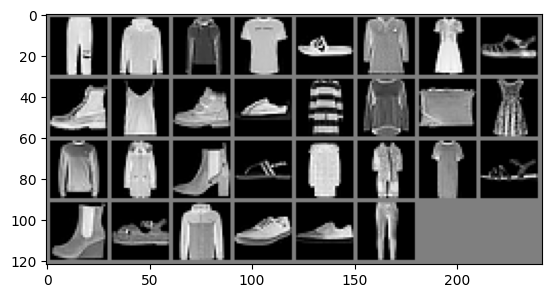

In [32]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2, 0)))
    

dataiter = iter(trainloader)
images, labels = next(dataiter)

print(f'Batch shape: {images.shape}')

#images and labels
imshow(torchvision.utils.make_grid(images))
print(' | '.join(f'{classes[labels[j]]}' for j in range(len(labels))))
    

# Create model from torch sequential model 

In [33]:
model = nn.Sequential(
    nn.Flatten(), # Turn [30, 1, 28, 28] into [30, 784]
    nn.Linear(28 * 28, 1024), # First FC layer
    nn.ReLU(), # Activation 
    nn.Linear(1024, 10) # Output layer
)

# Loss and Optimizer

In [34]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)

# Train Model 

In [ ]:
for epoch in range(30):
    running_loss = 0
    print_interval = 400
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        optimizer.zero_grad() 
        
        # forward
        outputs = model(inputs)    
        loss = criterion(outputs, labels)
        
        #back
        loss.backward()
        
        